# Drug Persistence EDA Notebook

Created by Noah Igram

For DataGlacier

In this notebook we explore the healthcare dataset given to us by ABC Pharma. We hope to better understand the data so that we can create as accurate a model as possible. 

## Data Set Overview

The data set comes from ABC Pharma. It contains 3424 rows of data, with each row corresponding to a unique patient. There are 69 columns in the data set, each of which is a feature of the dataset. The features range from demographic features to ones related to chronic risk factors, past health information, past drug usage and lastly whether or not the corresponding patient was persistent in taking ABC Pharma's prescribed medication. This last feature is the one which we hope to be able to accurately predict with our model. 

A quick look at the data set is below. 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_drug = pd.read_excel("Healthcare_dataset.xlsx",'Dataset')
df_drug.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


### Analysis of Categorical Features

In [4]:
df_drug.describe(include='object')

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls
count,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,...,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424
unique,3424,2,2,4,3,5,4,36,2,3,...,2,2,2,2,2,2,2,2,2,2
top,P1,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
freq,1,2135,3230,3148,3235,1383,1439,1535,2013,2104,...,3406,3066,3382,1788,3232,3357,3370,3413,3410,3355


In [8]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [18]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df_drug.columns:
    print('{} : {}'.format(col,df_drug[col].unique()))

Ptid : ['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
Persistency_Flag : ['Persistent' 'Non-Persistent']
Gender : ['Male' 'Female']
Race : ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
Ethnicity : ['Not Hispanic' 'Hispanic' 'Unknown']
Region : ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
Age_Bucket : ['>75' '55-65' '65-75' '<55']
Ntm_Speciality : ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL MEDICINE' 'ORTHOPEDICS' 'NEPHROLOGY'
 'GERIATRIC MEDICINE' 'HOSPICE AND PALLIATIVE MEDICINE'


## Analysis of Missing values

We can see from above that there are no missing values in the data set, however there seem to be some entries with "Other" or "Unknown" as their value. We will deal with these values when we perform data cleansing and create our model

## Plotting Features


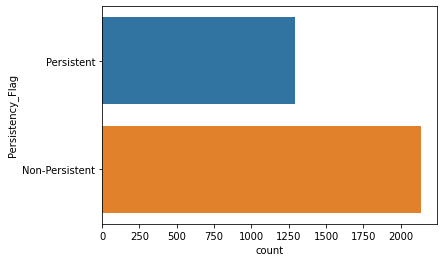

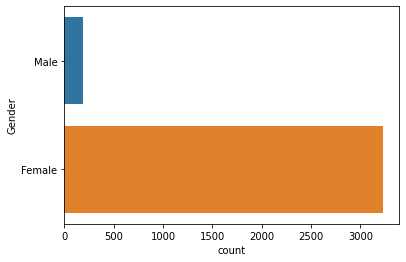

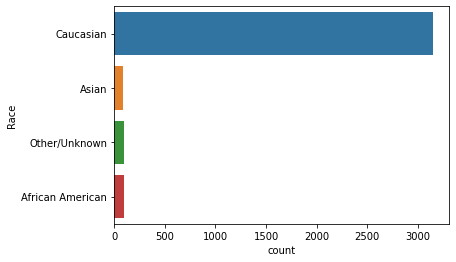

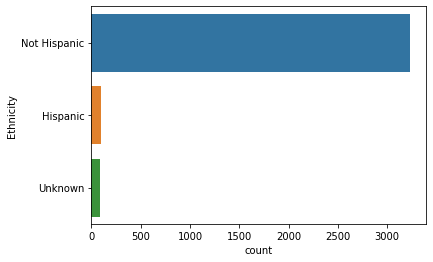

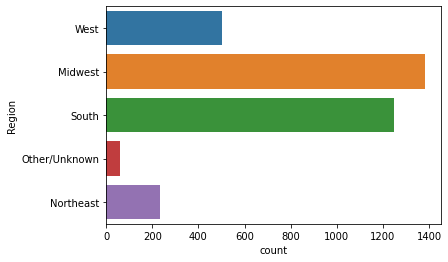

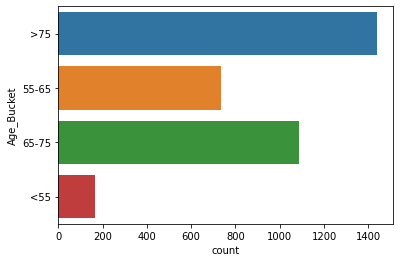

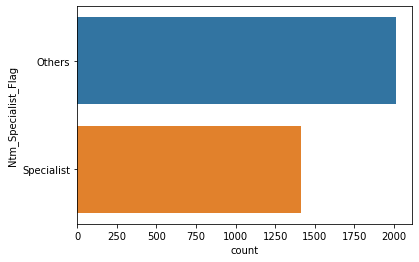

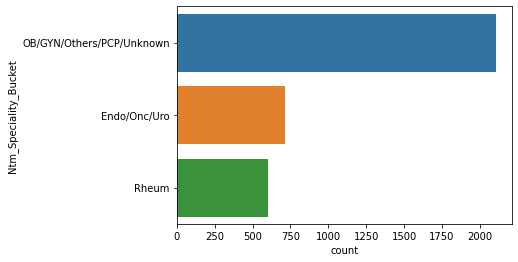

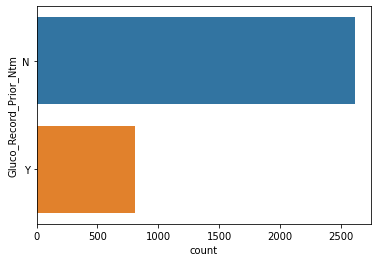

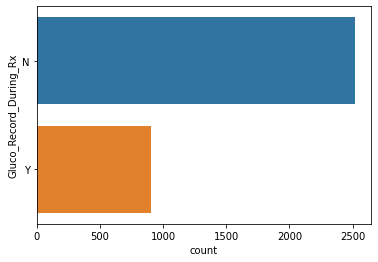

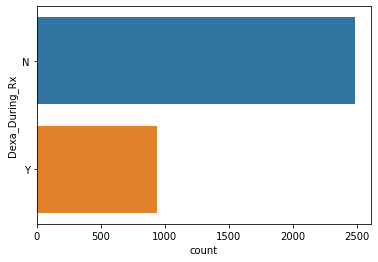

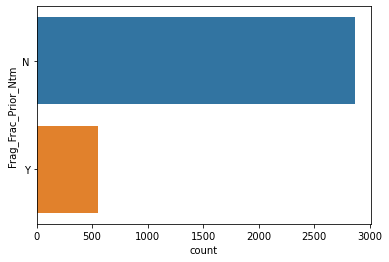

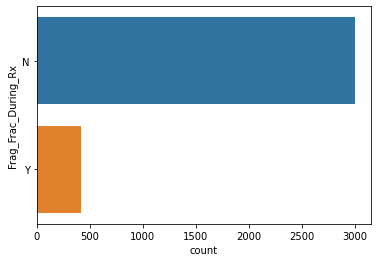

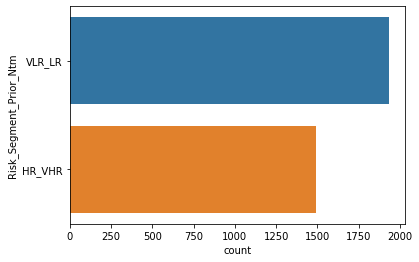

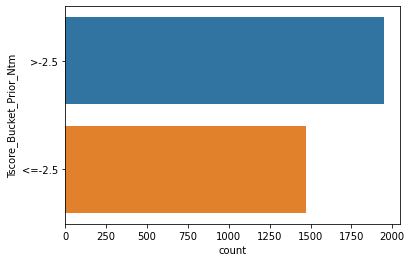

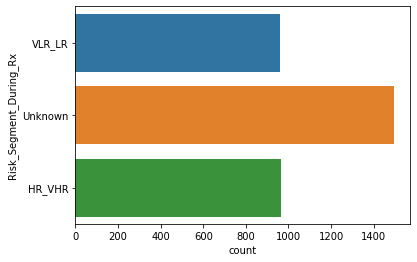

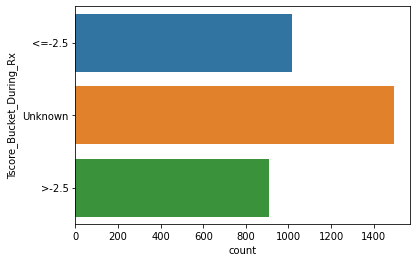

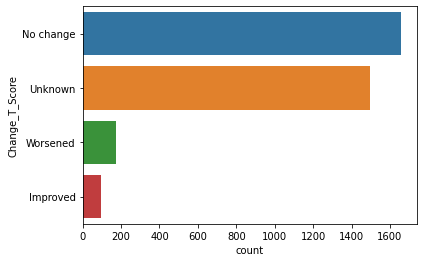

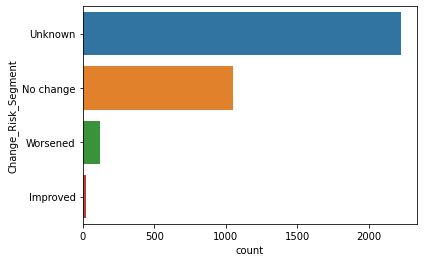

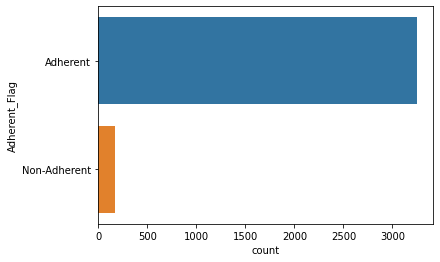

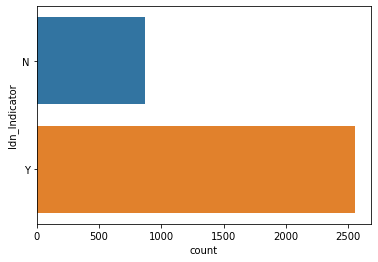

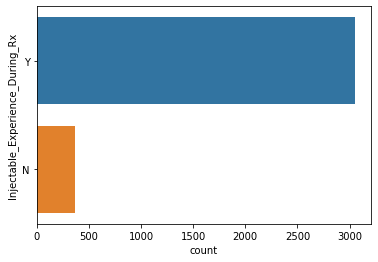

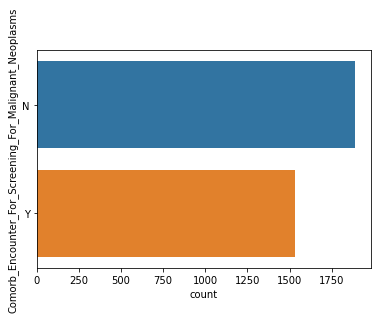

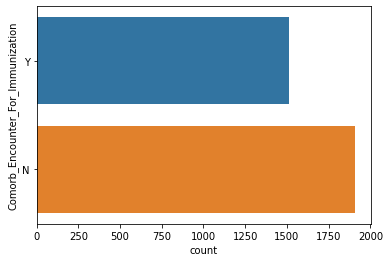

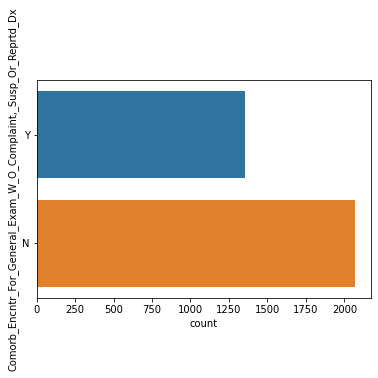

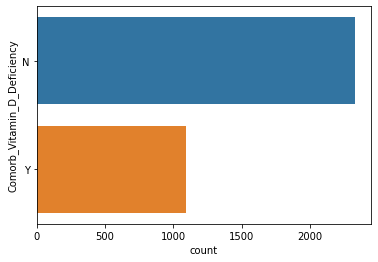

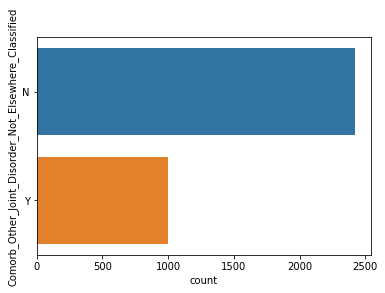

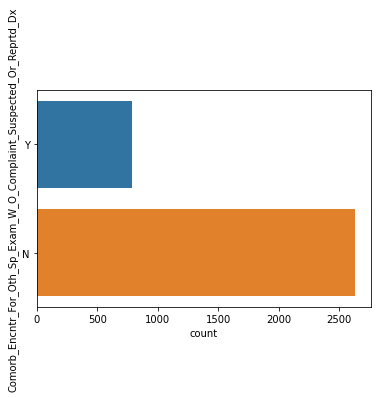

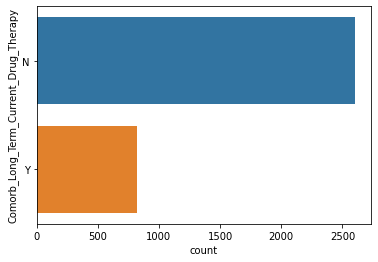

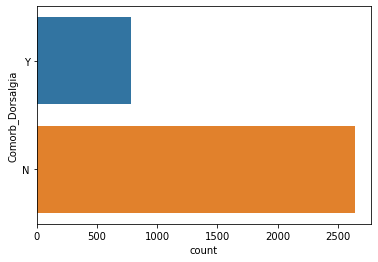

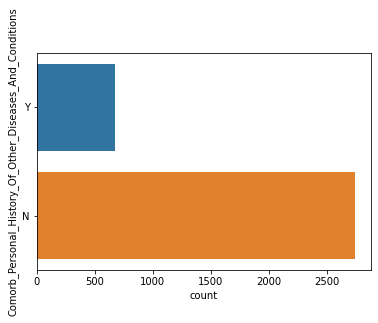

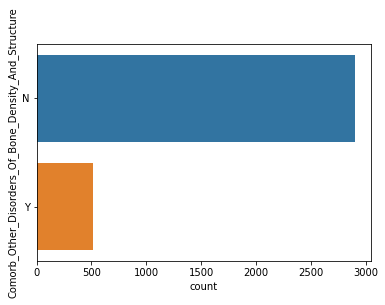

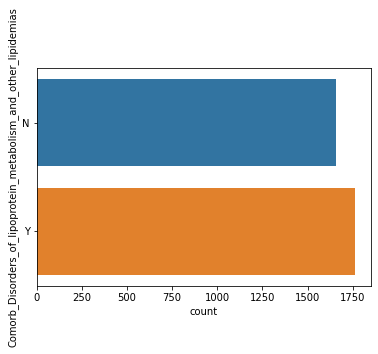

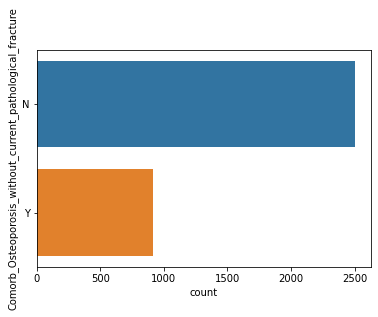

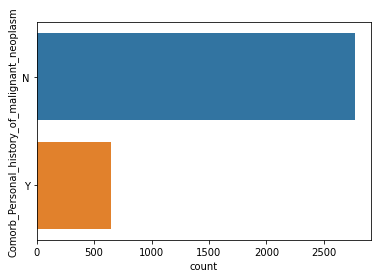

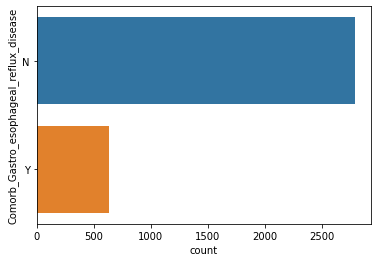

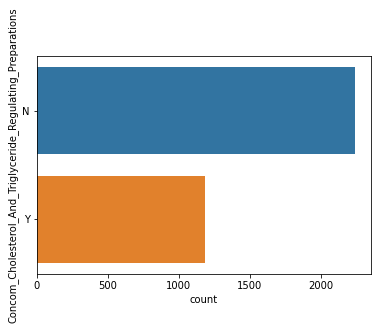

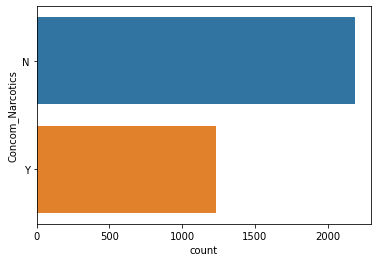

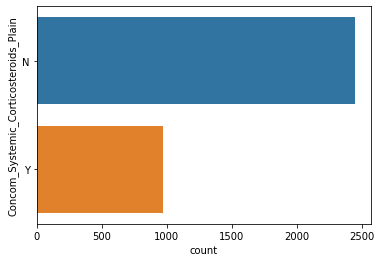

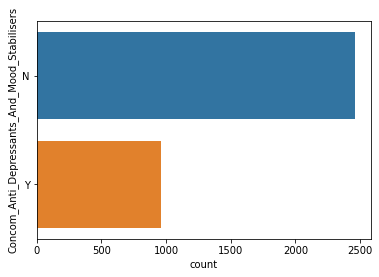

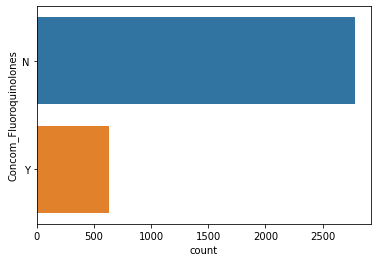

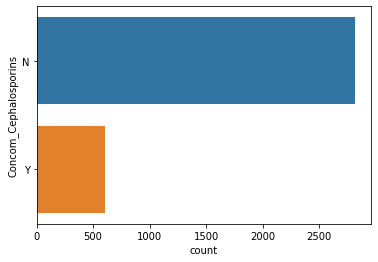

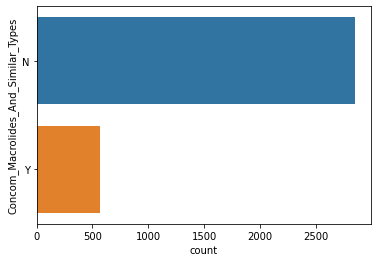

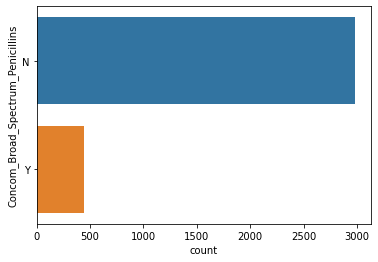

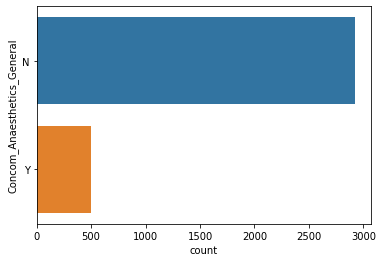

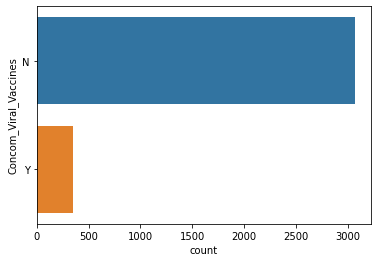

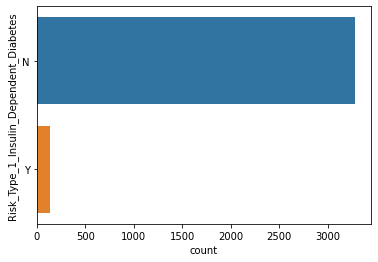

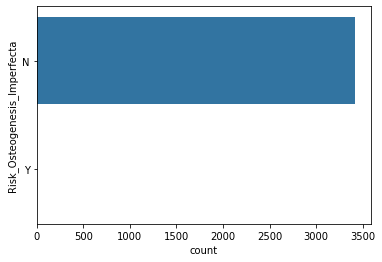

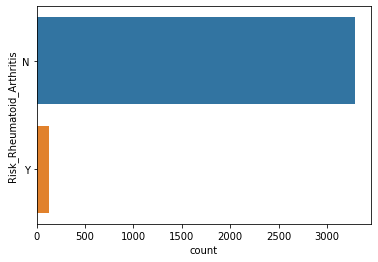

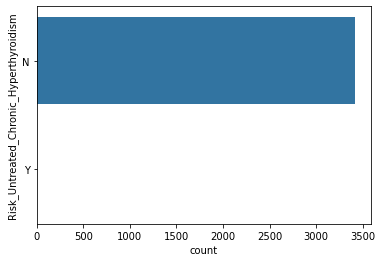

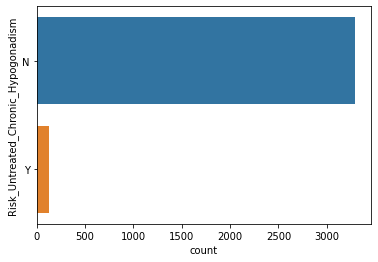

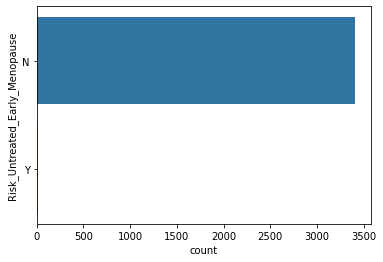

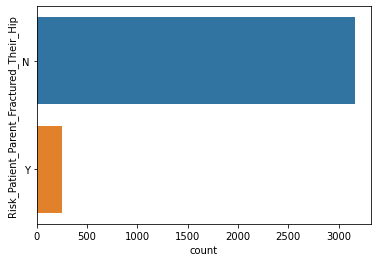

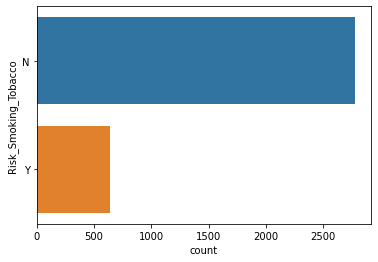

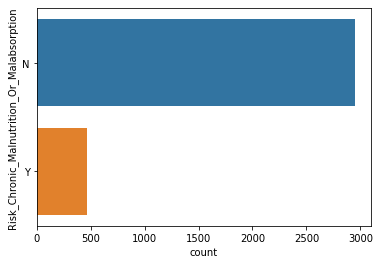

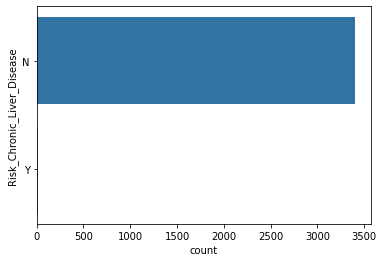

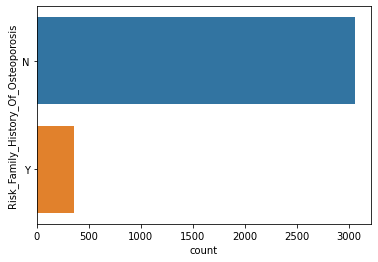

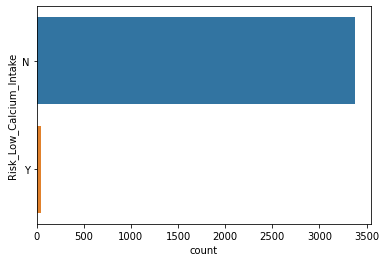

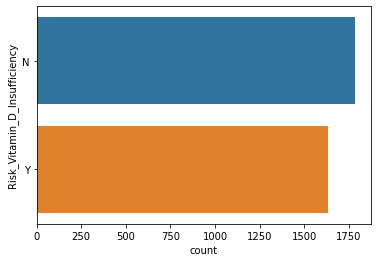

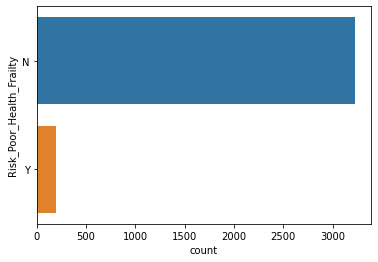

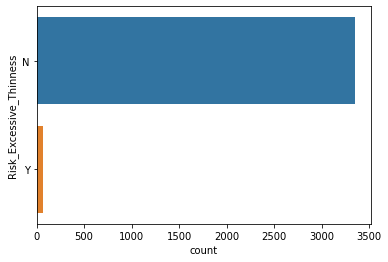

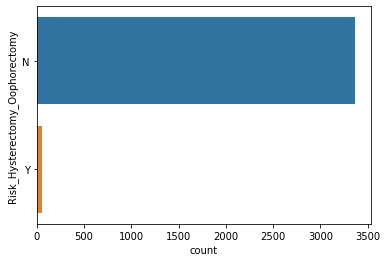

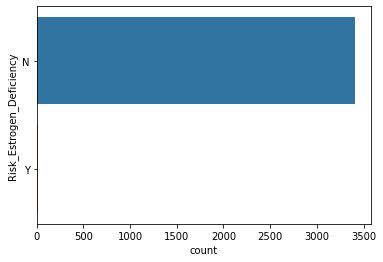

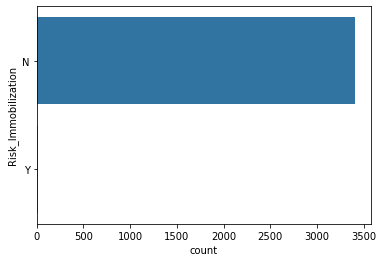

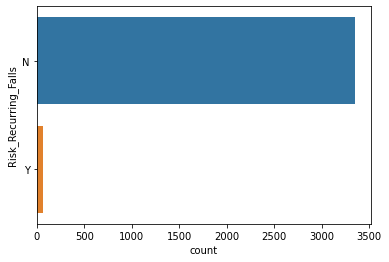

In [17]:
### Plotting
for col in df_drug.select_dtypes(include='object'):
    if df_drug[col].nunique() <= 22:
        sns.countplot(y=col, data=df_drug)
        plt.show()

We see from the bar plots above that some of the features have only 1 unique entry, meaning we can remove these columns from our dataset when creating the model for better performance. 

These columns are:
- Risk_Immobilization
- Risk_Estrogen_Deficiency
- Risk_Chronic_Liver_Disease
- Risk_Untreated_Early_Menopause
- Risk_Untreated_Chronic_Hyperthyroidism
- Risk_Osteogenesis_Imperfecta


In [13]:
df_drug.drop(['Risk_Immobilization','Risk_Estrogen_Deficiency','Risk_Chronic_Liver_Disease','Risk_Untreated_Early_Menopause','Risk_Untreated_Chronic_Hyperthyroidism','Risk_Osteogenesis_Imperfecta'],axis=1)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,Y,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,Y,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,N,N,Y,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


## Analysis of Key Features

Here we analyze some of the relationships between the categorical variables in the dataset (all of them are categorical)

### Persistence and Gender

In [22]:
pd.crosstab(index=df_drug['Gender'],columns=df_drug['Persistency_Flag'],margins=True,normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Gender,,
Female,0.624768,0.375232
Male,0.603093,0.396907
All,0.623540,0.376460


Here we see that gender does not have much of an effect on persistence.

### Persistence and Race

In [23]:
pd.crosstab(index=df_drug['Race'],columns=df_drug['Persistency_Flag'],margins=True,normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Race,,
African American,0.684211,0.315789
Asian,0.511905,0.488095
Caucasian,0.623571,0.376429
Other/Unknown,0.659794,0.340206
All,0.623540,0.376460


We can see from above that the African American group had the lowest proportion of patients who were flagged as persistent. The group with the highest proportion was the Asians, with a much higher percentage than the other groups at 48.8%

### Persistence and Region

In [24]:
pd.crosstab(index=df_drug['Region'],columns=df_drug['Persistency_Flag'],margins=True,normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Region,,
Midwest,0.675343,0.324657
Northeast,0.577586,0.422414
Other/Unknown,0.583333,0.416667
South,0.603849,0.396151
West,0.555777,0.444223
All,0.623540,0.376460


Here we see that the midwest region had the lowest percentage of patients flagged as 'Persistent', while the West had the highest

### Persistence and Age Group


In [25]:
pd.crosstab(index=df_drug['Age_Bucket'],columns=df_drug['Persistency_Flag'],margins=True,normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Age_Bucket,,
55-65,0.643929,0.356071
65-75,0.601289,0.398711
<55,0.620482,0.379518
>75,0.630299,0.369701
All,0.623540,0.376460


### Feature Elimination

This final step was performed later on during the model creation and testing phase. We wanted to see if eliminating some of the features improved the model, and we ended up elimination. This information can be found in the DataCleansing.ipynb.